# Importing Libraries

In [12]:
import numpy as np
import pandas as pd
# Import label encoder
from sklearn import preprocessing
# To Generate graphs for statistical representation
import matplotlib.pyplot as plt 
# To Generate heapmap graph  for statistical representation
import seaborn as sns
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
# Decision Trees model
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Dataset Import

**FEATURE EXPLANATION**<br>
<br><br>
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Dataset**

In [13]:
dataset=pd.read_csv('/content/full_data.csv')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [14]:
#shape of dataset
print('shape of dataset:',dataset.shape)
print('the Column of Dataset :' , dataset.shape[1])
print('the index of Dataset :' , dataset.shape[0])

shape of dataset: (4981, 11)
the Column of Dataset : 11
the index of Dataset : 4981


4981 instances, 11 attrbutes <br>
11th attribute is location which we will remove when training the model

In [15]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
dataset.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


# Exploratory Data Analysis (EDA)

# Data Pre-processing

In [17]:
#find the null or missing value of dataset attributes
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

None of the entries are Null and missing

In [18]:
#information  of Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Dataset has not null, missing and unknown values. It has 11 attributes and 4981 instance.

In [19]:
#description of Dataset (min , max , mean , count ,std and IQR(25%,50% & 75%))
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# VISUALIZATION

Text(0.5, 1.0, 'Distribution of Continuous Variables')

<Figure size 640x480 with 0 Axes>

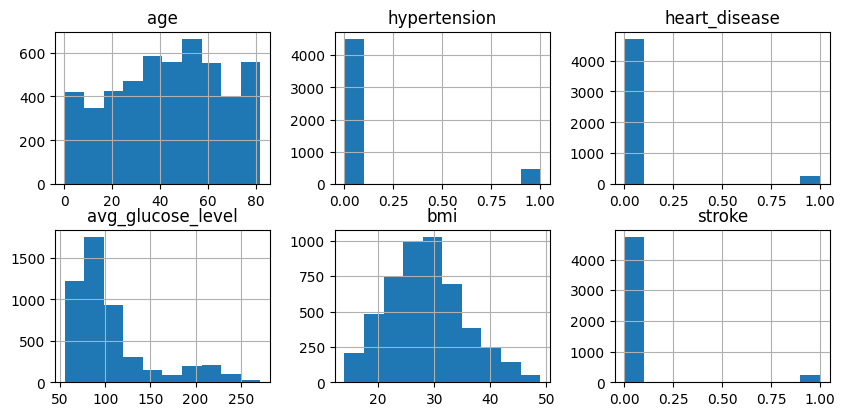

In [20]:
#Distribution of Continuous variables
plt.figure()
dataset.hist(layout=(8,3), figsize=(10,20))
plt.title('Distribution of Continuous Variables')

# CATEGORICAL VISUALIZATION

# pie chart the proportion of stroke among gender

gender
Female    140
Male      108
Name: stroke, dtype: int64


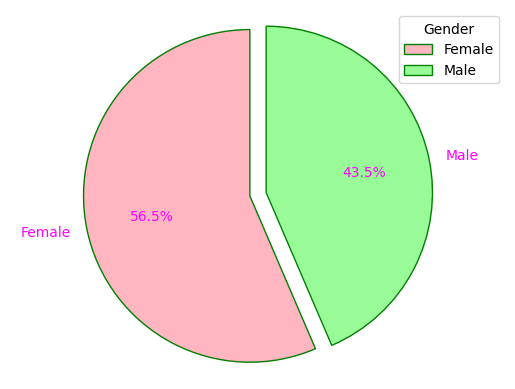

In [21]:
#pie chart the proportion of stroke among gender
gender= dataset.groupby(dataset['gender'])['stroke'].sum()
print(gender)
labels= gender.index
values= gender.values
colors=['lightpink', 'palegreen']
explode = (0.1, 0.0)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
plt.pie(gender,labels=labels, colors=colors, startangle=90, explode = explode,autopct='%1.1f%%' , wedgeprops = wp ,textprops = dict(color ="magenta") )
plt.legend(title="Gender")
plt.axis('equal')
plt.show()


Female stroke Prediction is Maximum then Male. Female has to face the 56.5% Brain_Stroke_Prediction  and Male has to face the 43.5% Brain_stroke_Prediction

# pie chart the proportion of stroke among ever_married

ever_married
No      29
Yes    219
Name: stroke, dtype: int64


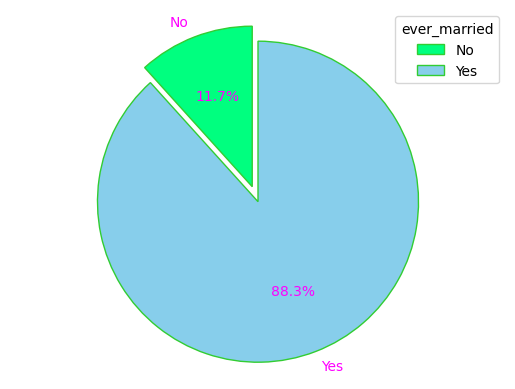

In [22]:
#pie chart the proportion of stroke among ever_married
ever_married= dataset.groupby(dataset['ever_married'])['stroke'].sum()
print(ever_married)
labels= ever_married.index
values= ever_married.values
explode = (0.1, 0.0)
wp = { 'linewidth' : 1, 'edgecolor' : "limegreen" }
colors=['springgreen', 'skyblue']

plt.pie(ever_married,labels=labels, colors=colors, startangle=90, explode = explode,autopct='%1.1f%%' , wedgeprops = wp ,textprops = dict(color ="magenta"))
plt.legend(title="ever_married")
plt.axis('equal')
plt.show()

According dataset Prediction,It has highest chance ever_married people face the brain_stroke prediction disease.**88.3%** ever_married people face the brain_stroke prediction disease and **11.7%** non ever_married people face the brain_stroke prediction disease.

# pie chart the proportion of stroke among Residence_type

Residence_type
Rural    113
Urban    135
Name: stroke, dtype: int64


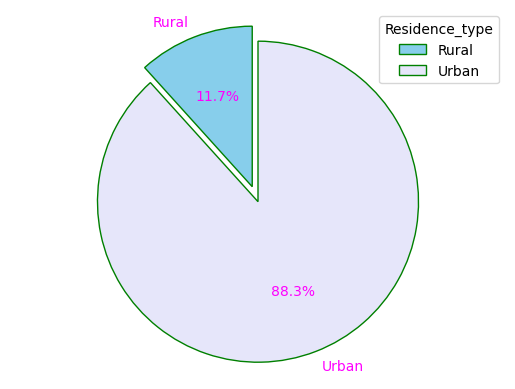

In [23]:
#pie chart the proportion of stroke among Residence_type
Residence_type= dataset.groupby(dataset['Residence_type'])['stroke'].sum()
print(Residence_type)
labels= Residence_type.index
values= Residence_type.values
explode = (0.1, 0.0)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
colors=['skyblue', 'lavender']

plt.pie(ever_married,labels=labels, colors=colors, startangle=90, explode = explode,autopct='%1.1f%%' , wedgeprops = wp ,textprops = dict(color ="magenta"))
plt.legend(title="Residence_type")
plt.axis('equal')
plt.show()

According dataset Prediction,It has highest chance Urban Socity area face the brain_stroke prediction disease.**88.3%** Urban Socity area face the brain_stroke prediction disease and **11.7%** Rural Socity area people face the brain_stroke prediction disease.

# pie chart the proportion of stroke among smoking_status

smoking_status
Unknown            47
formerly smoked    70
never smoked       89
smokes             42
Name: stroke, dtype: int64


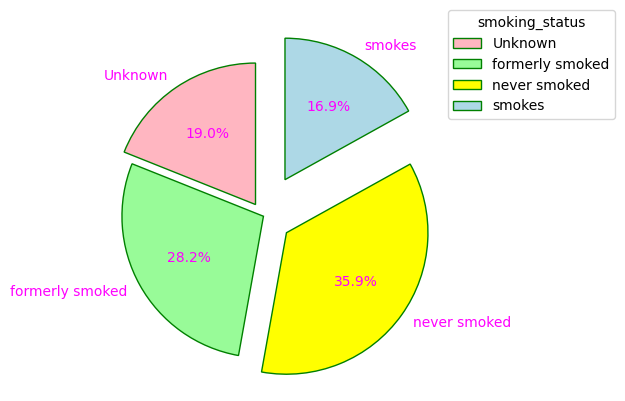

In [24]:
#pie chart the proportion of stroke among smoking_status
smoking_status= dataset.groupby(dataset['smoking_status'])['stroke'].sum()
print(smoking_status)
labels= smoking_status.index
values= smoking_status.values
explode = (0.1, 0.0,0.2,0.3)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
colors=['lightpink', 'palegreen', 'yellow' , 'lightblue']

plt.pie(smoking_status,labels=labels, colors=colors, startangle=90, explode = explode,autopct='%1.1f%%' , wedgeprops = wp ,textprops = dict(color ="magenta"))
plt.legend(title="smoking_status" , loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.axis('equal')
plt.show()

**35.9%** people has faced the brain_stroke diesaes who  is never smoked.Formerly smoked people has faced the **28.2%** brain_stroke disesae and unknown , smokes have faced the **19.0%** and **16.9%** .

# pie chart the proportion of stroke among work_type

work_type
Govt_job          33
Private          148
Self-employed     65
children           2
Name: stroke, dtype: int64


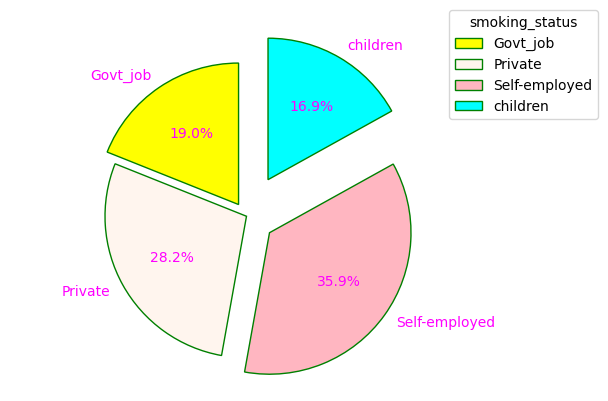

In [25]:
#pie chart the proportion of stroke among work_type
work_type= dataset.groupby(dataset['work_type'])['stroke'].sum()
print(work_type)
labels= work_type.index
values= work_type.values
explode = (0.1, 0.0,0.2,0.3)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
colors=['yellow' , 'seashell','lightpink', 'cyan']

plt.pie(smoking_status,labels=labels, colors=colors, startangle=90, explode = explode,autopct='%1.1f%%' , wedgeprops = wp ,textprops = dict(color ="magenta"))
plt.legend(title="smoking_status" , loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.axis('equal')
plt.show()

**35.9%** Self-employed has faced the brain_stroke diesaes .Private Employed has faced the **28.2%** brain_stroke disesae and Govt_job employed , children have faced the **19.0%** and **16.9%**.

# NUMERICAL VISUALIZATION

# pie chart the proportion of stroke among bmi

<Axes: xlabel='bmi', ylabel='Count'>

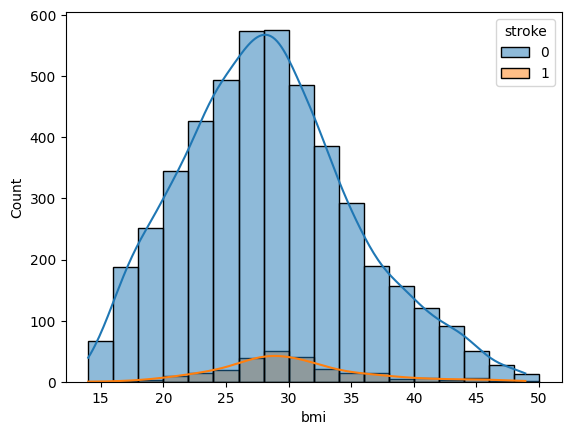

In [26]:
#pie chart the proportion of stroke among bmi
sns.histplot(x='bmi', data=dataset, hue='stroke', binwidth=2, kde=True)

<Axes: xlabel='hypertension', ylabel='Count'>

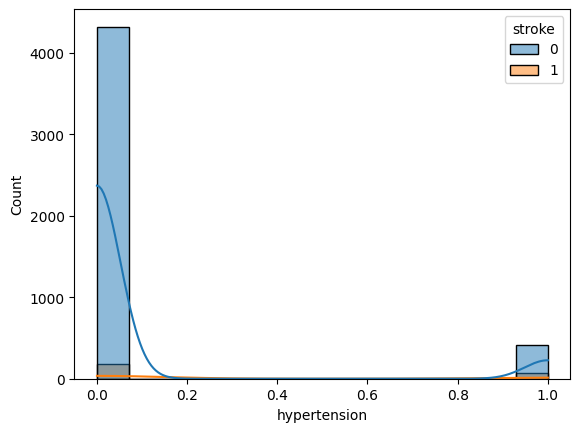

In [27]:
#pie chart the proportion of stroke among hypertension
sns.histplot(x='hypertension', data=dataset, hue='stroke', kde=True)

# pie chart the proportion of stroke among heart_disease

<Axes: xlabel='heart_disease', ylabel='Count'>

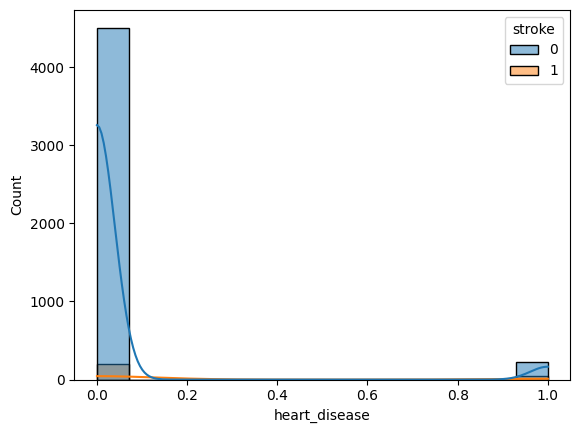

In [28]:
#pie chart the proportion of stroke among heart_disease
sns.histplot(x='heart_disease', data=dataset, hue='stroke', kde=True)

# pie chart the proportion of stroke among avg_glucose_level

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

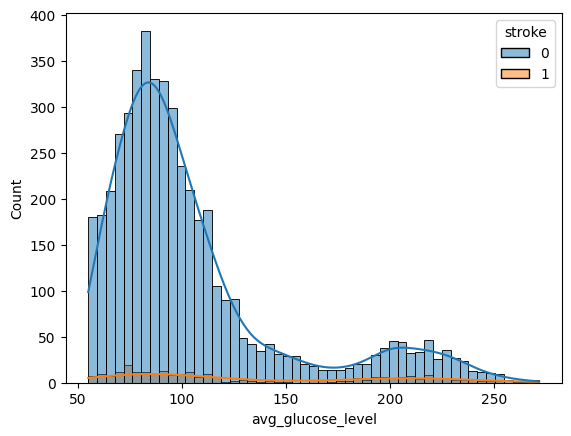

In [29]:
#pie chart the proportion of stroke among avg_glucose_level
sns.histplot(x='avg_glucose_level', data=dataset, hue='stroke', kde=True)

# pie chart the proportion of stroke among age

<Axes: xlabel='age', ylabel='Count'>

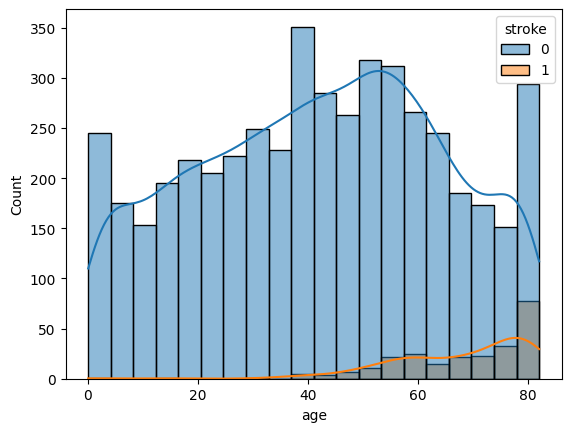

In [30]:
#pie chart the proportion of stroke among age
sns.histplot(x='age', data=dataset, hue='stroke', kde=True)

In [31]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Label Encoder

In [32]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'gender'.
dataset['gender']= label_encoder.fit_transform(dataset['gender'])
# Encode labels in column 'ever_married'.
dataset['ever_married']= label_encoder.fit_transform(dataset['ever_married'])
# Encode labels in column 'Residence_type'.
dataset['Residence_type']= label_encoder.fit_transform(dataset['Residence_type'])
# Encode labels in column 'smoking_status'.
dataset['smoking_status']= label_encoder.fit_transform(dataset['smoking_status'])
# Encode labels in column 'work_type'.
dataset['work_type']= label_encoder.fit_transform(dataset['work_type'])

In [33]:
#description of Dataset (min , max , mean , count ,std and IQR(25%,50% & 75%))
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [34]:
dataset.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


# Multivariate Analysis

# Heapmap

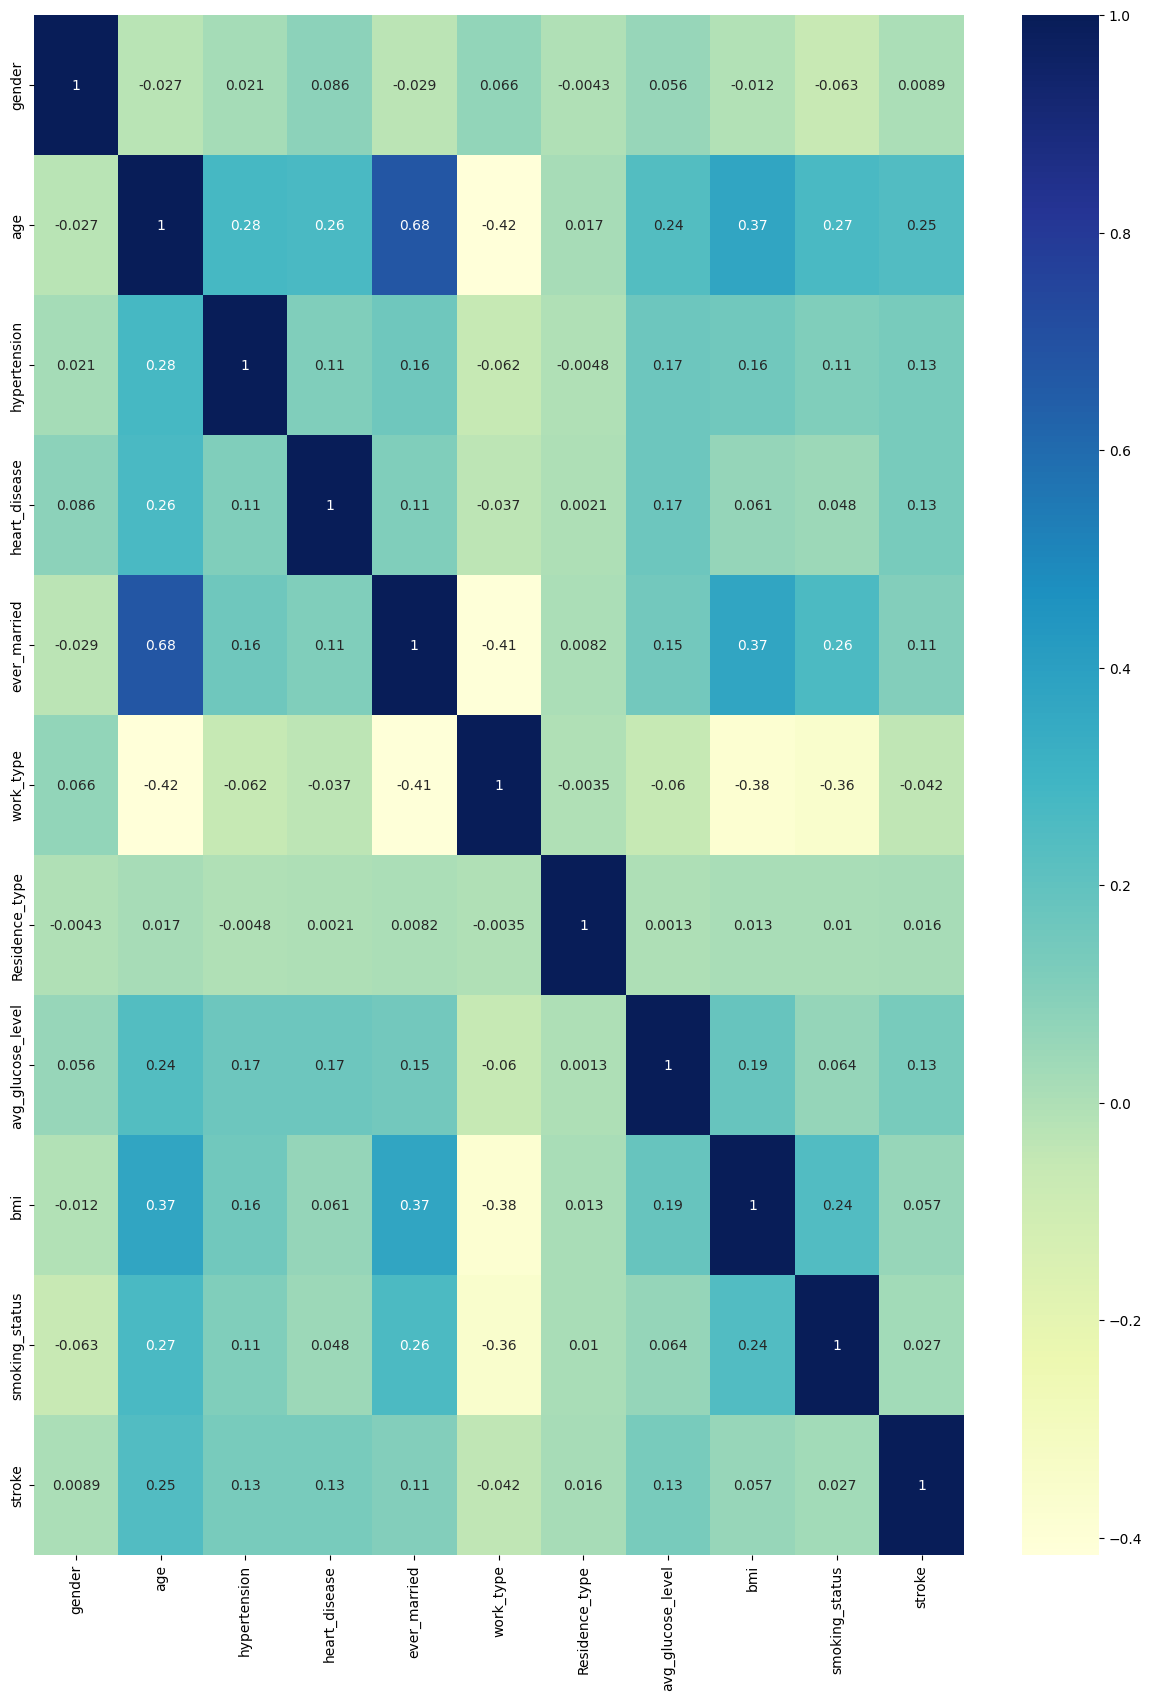

In [35]:
# Use the heatmap function from the seaborn package
plt.figure(figsize=(15,20))
sns.heatmap(dataset.corr() , annot=True , cmap="YlGnBu")
plt.show()

# Model Building

In [36]:
x=dataset.drop(columns=['stroke'] , axis=1)
print(x.shape)
y=dataset['stroke']
print(y.shape)

(4981, 10)
(4981,)


# Training Dataset

In [37]:
#Test Train split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 100)

In [38]:
#shape of split dataset
print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_test',y_test.shape)

shape of X_train (3486, 10)
shape of y_train (3486,)
shape of X_test (1495, 10)
shape of y_test (1495,)


# Model development 

# Decision Tree Classifier model

In [39]:
# Create Decision Tree classifer object
classifier_decision = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier_decision = classifier_decision.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier_decision.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [40]:
# Evaluating Model
# Model Accuracy, how often is the classifier correct?
d_score=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",d_score*100)

Accuracy: 91.37123745819397


In [41]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.95      1424\n           1       0.15      0.17      0.16        71\n\n    accuracy                           0.91      1495\n   macro avg       0.55      0.56      0.56      1495\nweighted avg       0.92      0.91      0.92      1495\n'

# Graphical Representation of Decision Tree Classifier

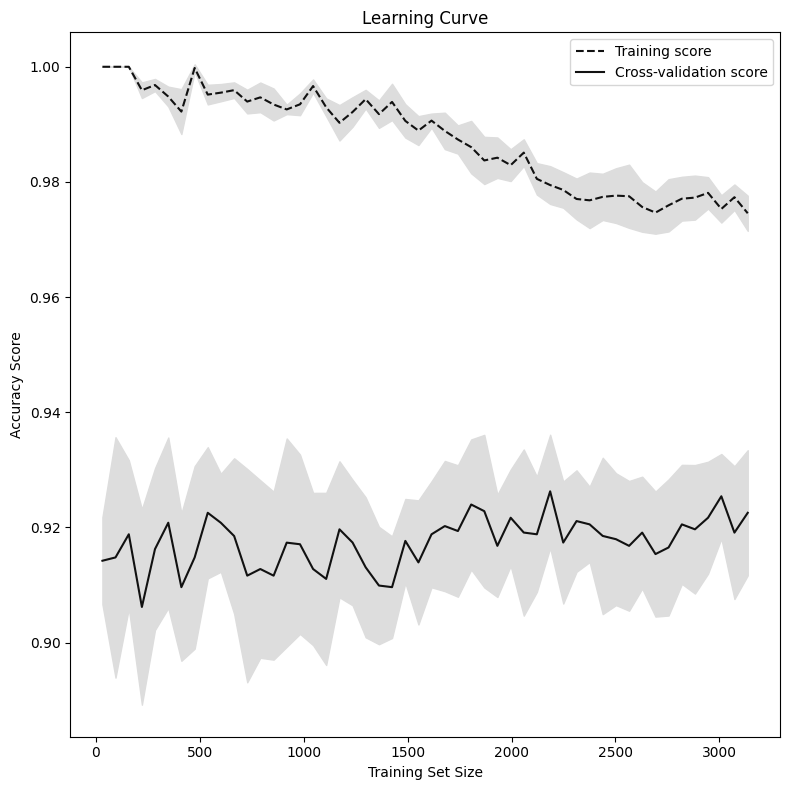

In [42]:
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=10, random_state=1), X_train,y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
#calculated the mean and standard deviation of the train and test scores.
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
# plot the learning curve graph
plt.subplots(1, figsize=(8,8))
plt.plot(train_sizes, train_score_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_score_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color="#DDDDDD")
#title of the graph
plt.title("Learning Curve")
#lable of axis (x-axis= training set size , y-axis=accuracy score)
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
#To show
plt.show()

# Random Forest Classifier model

In [43]:
# Create Random forest classifer object
ram_model= RandomForestClassifier(n_estimators = 300)
# Train the Random Forest Classifier
ram_model.fit(X_train, y_train)
#Predict the response for test dataset
x_predict = ram_model.predict(X_test)
print(x_predict)

[0 0 0 ... 0 0 0]


In [44]:
r_score=accuracy_score(y_test, x_predict)
print("Accuracy:",r_score*100)

Accuracy: 95.18394648829431


In [45]:
print(classification_report(y_test, x_predict))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1424
           1       0.00      0.00      0.00        71

    accuracy                           0.95      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.95      0.93      1495



# Graphical Representation of Random Forest Classifier




In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(max_depth=10, random_state=1), X_train,y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
#calculated the mean and standard deviation of the train and test scores.
train_score_mean = np.mean(train_scores, axis=1)
train_score_std = np.std(train_scores, axis=1)
test_score_mean = np.mean(test_scores, axis=1)
test_score_std = np.std(test_scores, axis=1)
# plot the learning curve graph
plt.subplots(1, figsize=(8,8))
plt.plot(train_sizes, train_score_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_score_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_score_mean - train_score_std, train_score_mean + train_score_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, color="#DDDDDD")
#title of the graph
plt.title("Learning Curve")
#lable of axis (x-axis= training set size , y-axis=accuracy score)
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
#To show
plt.show()

**Comparing all the models**

In [ ]:
fig = plt.figure()
bars = ['Descision Tree', 'Random Forest']
height = [r_score, d_score]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['skyblue', 'palegreen'] )
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models accuracy")
plt.show()

Accuracy

 1)DT = 91% <br>
 2)RF = 95%